<a href="https://colab.research.google.com/github/wolego2uni/projects/blob/main/001140837_Fagbohun_COMP1831_Decision_Tree_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Technologies for Anti-Money Laundering and Financial Crime**
# **COMP-1831** 

# **IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# **IMPORT DATASET**

# **EXERCISE A**

In [ ]:
df = pd.read_csv("transactions.csv")

In [ ]:
df.head()

,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [ ]:
df.describe()['amount']

count    2.000000e+05
mean     1.808112e+05
std      3.291800e+05
min      3.200000e-01
25%      1.201612e+04
50%      6.872104e+04
75%      2.290791e+05
max      1.000000e+07
Name: amount, dtype: float64

In [ ]:
# checking for null values in the dataset
df.isnull().sum()

Unnamed: 0        0
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [ ]:
df.columns

Index(['Unnamed: 0', 'step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest',
       'isFraud'],
      dtype='object')

# **EXERCISE B**

In [ ]:
df['isFraud'].value_counts()

0    199853
1       147
Name: isFraud, dtype: int64

0    199853
1       147
Name: isFraud, dtype: int64

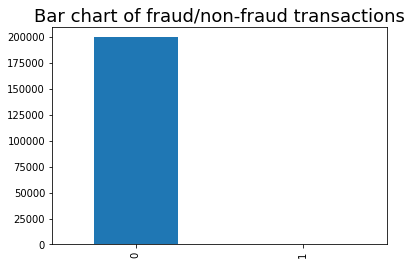

In [ ]:
df['isFraud'].value_counts().plot(kind='bar')
plt.title('Bar chart of fraud/non-fraud transactions', fontsize = 18)
df['isFraud'].value_counts()

In [ ]:
print('Proportion of fraudulent transaction: {: .2f}%' .format(df['isFraud'].value_counts()[1]/df['isFraud'].size * 100))

Proportion of fraudulent transaction:  0.07%


# **Undersampling**

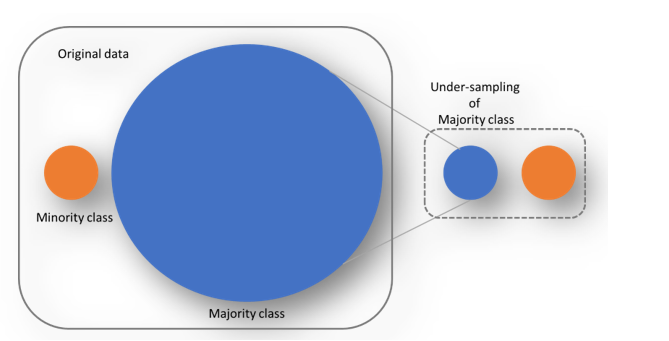

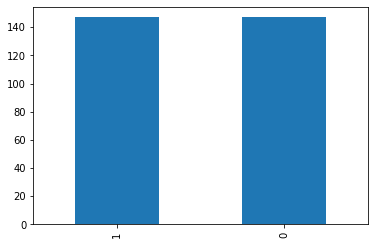

In [ ]:
isFraud_count = len(df[df['isFraud'] == 1])
not_Fraud_count = len(df[df['isFraud'] == 0])

sampled_not_Fraud = df[df['isFraud'] == 0].sample(n=isFraud_count)
isFraud = df[df['isFraud'] == 1]

sampled_not_Fraud.reset_index(drop=True, inplace=True)
isFraud.reset_index(drop=True, inplace=True)

balanced_df = pd.concat([sampled_not_Fraud, isFraud]).reset_index(drop=True);

balanced_df['isFraud'].value_counts().plot(kind='bar')

# ***Heatmap**

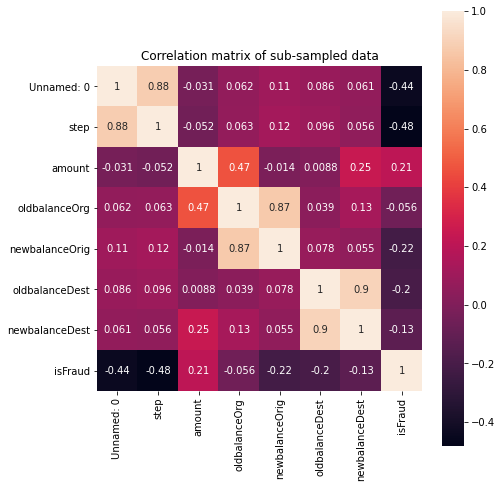

In [ ]:
corrmat = balanced_df.corr()
f, ax = plt.subplots(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title('Correlation matrix of sub-sampled data')
sns.heatmap(corrmat, vmax=1,annot=True,square=True)

# **Pair plot**

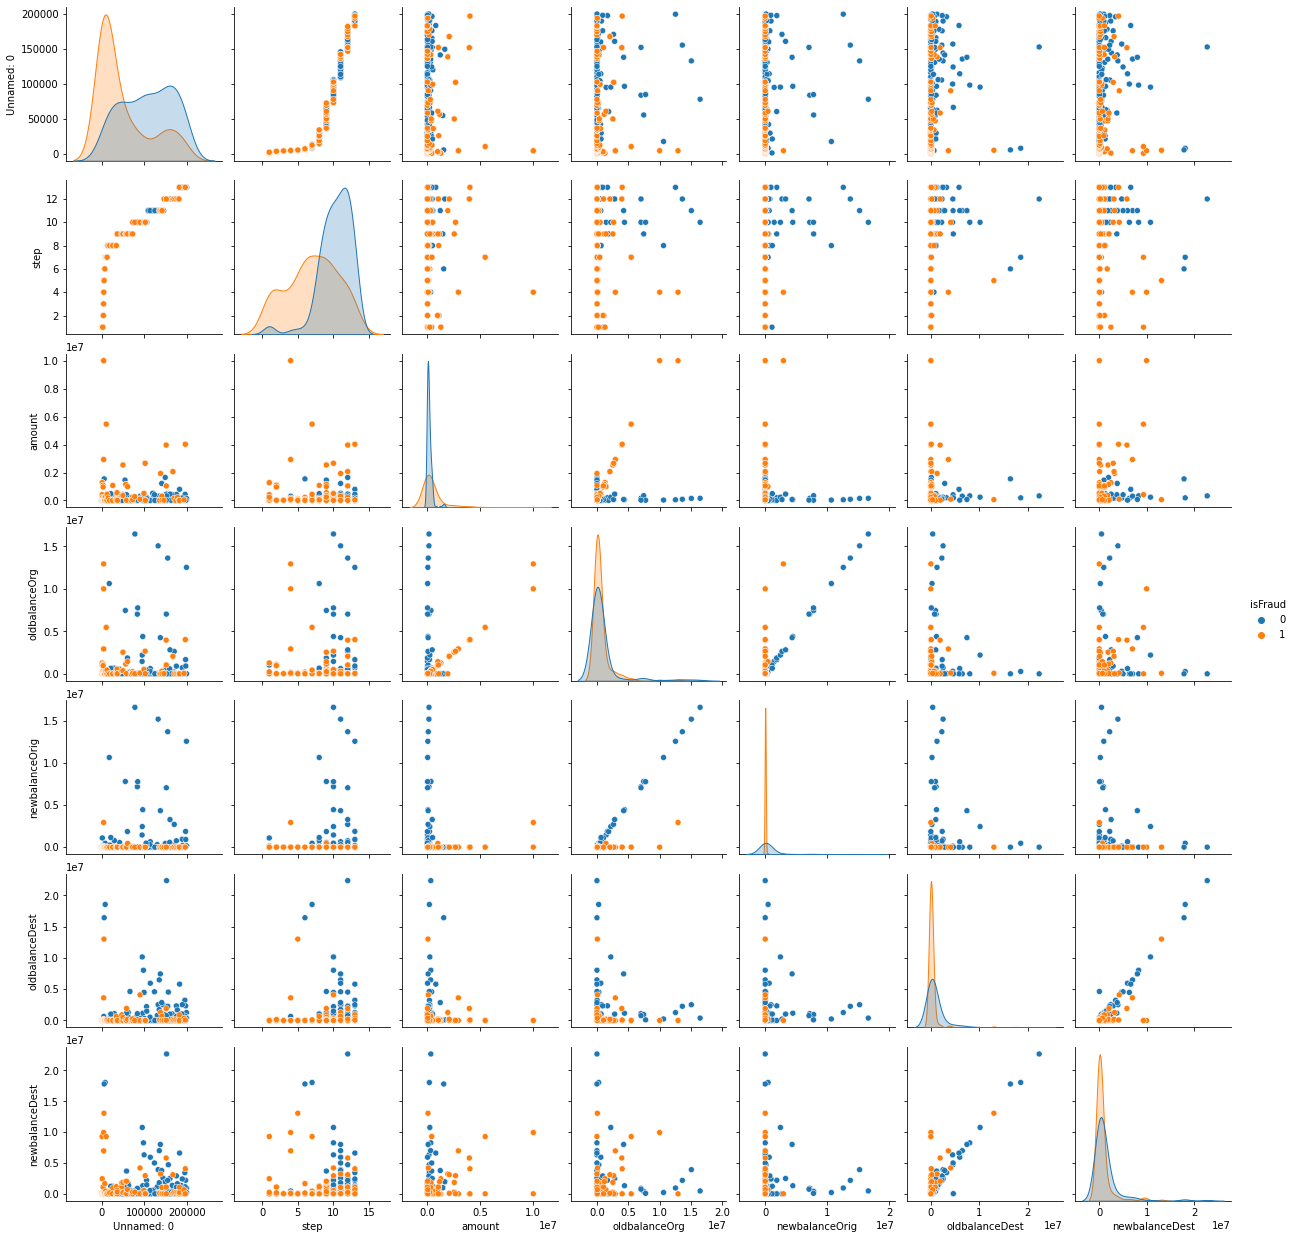

In [ ]:
sns.pairplot(balanced_df, hue="isFraud")

In [ ]:
balanced_df.columns

Index(['Unnamed: 0', 'step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest',
       'isFraud'],
      dtype='object')

In [ ]:
balanced_df[['newbalanceOrig','isFraud']].value_counts()

newbalanceOrig  isFraud
0.00            1          145
                0           86
45021.88        0            1
246213.56       0            1
211362.21       0            1
                          ... 
479967.94       0            1
465410.09       0            1
443690.01       0            1
442917.67       1            1
302979.06       0            1
Length: 65, dtype: int64

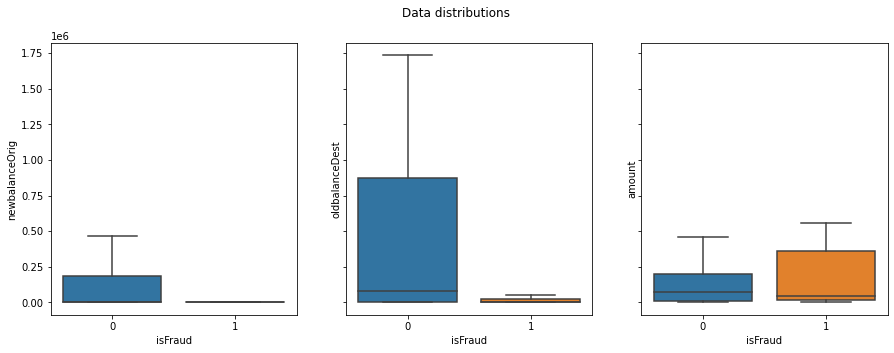

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Data distributions')

sns.boxplot(ax=axes[0], x="isFraud", y="newbalanceOrig", data=balanced_df,showfliers=False)
sns.boxplot(ax=axes[1], x="isFraud", y="oldbalanceDest", data=balanced_df,showfliers=False)
sns.boxplot(ax=axes[2], x="isFraud", y="amount", data=balanced_df,showfliers=False)

## Feature Engineering

In [ ]:
df.head()

,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [ ]:
df['nameDest'].unique()

array(['M1979787155', 'M2044282225', 'C553264065', ..., 'C1587454679',
       'M855368711', 'C1091477477'], dtype=object)

In [ ]:
features = balanced_df.copy(deep=True)
features['name'] = features['nameOrig'].str.contains('C')
features['Dest'] = features['nameDest'].str.contains('C')

In [ ]:
features['hasDest'] = ~features['Dest'].isnull()

In [ ]:
features

,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,name,Dest,hasDest
0,187468,13,CASH_OUT,124284.32,C1084784210,0.00,0.00,C2084365054,508091.55,1333034.21,0,True,True,True
1,14077,8,PAYMENT,1861.55,C1732807824,0.00,0.00,M194339335,0.00,0.00,0,True,False,True
2,156806,12,CASH_OUT,174710.43,C1364224651,303892.00,129181.57,C1502487300,4538050.20,4712760.62,0,True,True,True
3,108995,11,PAYMENT,7919.52,C1724828196,806.00,0.00,M1976458778,0.00,0.00,0,True,False,True
4,186798,13,CASH_OUT,136825.48,C634004778,0.00,0.00,C1574575239,702339.14,839164.61,0,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,182862,13,CASH_OUT,408.00,C1894004688,408.00,0.00,C1293978242,898297.85,1075854.14,1,True,True,True
290,193765,13,TRANSFER,48375.02,C920803432,48375.02,0.00,C1767389067,0.00,0.00,1,True,True,True
291,193766,13,CASH_OUT,48375.02,C1894578299,48375.02,0.00,C590035788,374803.26,658520.33,1,True,True,True
292,196775,13,TRANSFER,4022667.54,C735463888,4022667.54,0.00,C1548348754,0.00,0.00,1,True,True,True


In [ ]:
feature_cols = features.columns[:-1]
label = features.columns[-1:]

In [ ]:
X = features[feature_cols]
y = features[label]

In [ ]:
features.columns

Index(['Unnamed: 0', 'step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest',
       'isFraud', 'name', 'Dest', 'hasDest'],
      dtype='object')

In [ ]:
features.dtypes

Unnamed: 0          int64
step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
name                 bool
Dest                 bool
hasDest              bool
dtype: object

#**Categorical Variables**

In [ ]:
categorical_dict = {
    "type": "category",
    "nameOrig": "category",
    "nameDest": "category"
  
}

X = X.astype(categorical_dict)

for col in categorical_dict.keys():
  X = X.join(pd.get_dummies(X[[col]], prefix=col)).drop([col], axis=1)

X.head()

,Unnamed: 0,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,name,Dest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameOrig_C1004271827,nameOrig_C1020461364,nameOrig_C1023505879,nameOrig_C102617052,nameOrig_C1026280121,nameOrig_C1033976898,nameOrig_C1034219836,nameOrig_C1034673425,nameOrig_C1038414385,nameOrig_C1039324808,nameOrig_C1040938524,nameOrig_C105344994,nameOrig_C1076646882,nameOrig_C1084784210,nameOrig_C1087133093,nameOrig_C1091700594,nameOrig_C1092779857,nameOrig_C1093223281,nameOrig_C1098250442,nameOrig_C1101705841,nameOrig_C1105700111,nameOrig_C1117195368,nameOrig_C1117547412,nameOrig_C1118430673,nameOrig_C1121789613,...,nameDest_M150093383,nameDest_M151442075,nameDest_M151681899,nameDest_M1582455315,nameDest_M1665462228,nameDest_M1678171494,nameDest_M1873526034,nameDest_M1904025320,nameDest_M1906011690,nameDest_M190919118,nameDest_M194339335,nameDest_M1976458778,nameDest_M198821790,nameDest_M1996862123,nameDest_M2040652736,nameDest_M2142919117,nameDest_M221608891,nameDest_M240035216,nameDest_M255686944,nameDest_M263526631,nameDest_M276684731,nameDest_M325487524,nameDest_M355765139,nameDest_M399131389,nameDest_M438594215,nameDest_M447939000,nameDest_M496969015,nameDest_M497790725,nameDest_M642930180,nameDest_M658586635,nameDest_M675960211,nameDest_M691522628,nameDest_M70150841,nameDest_M702045587,nameDest_M846658918,nameDest_M880718056,nameDest_M903216304,nameDest_M909065574,nameDest_M938083102,nameDest_M943009836
0,187468,13,124284.32,0.0,0.00,508091.55,1333034.21,0,True,True,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,14077,8,1861.55,0.0,0.00,0.00,0.00,0,True,False,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,156806,12,174710.43,303892.0,129181.57,4538050.20,4712760.62,0,True,True,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,108995,11,7919.52,806.0,0.00,0.00,0.00,0,True,False,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,186798,13,136825.48,0.0,0.00,702339.14,839164.61,0,True,True,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Modeling

In [ ]:
features.columns

Index(['Unnamed: 0', 'step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest',
       'isFraud', 'name', 'Dest', 'hasDest'],
      dtype='object')

In [ ]:
features.isnull().sum()

Unnamed: 0        0
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
name              0
Dest              0
hasDest           0
dtype: int64

In [ ]:
features = features.drop(columns=['nameDest', 'name' ])

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
y = features['isFraud']

features = features.drop(columns=['isFraud'])
X= features

In [ ]:
X.dtypes

Unnamed: 0          int64
step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
Dest                 bool
hasDest              bool
dtype: object

In [ ]:
X = X.drop(columns=['Dest', 'hasDest', 'nameOrig', 'type'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(205, 7)
(205,)
(89, 7)
(89,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=1)

dt_clf = dt_clf.fit(X_train,y_train)

y_pred = dt_clf.predict(X_test)

In [ ]:
y_test

268    1
269    1
280    1
110    0
167    1
      ..
176    1
44     0
157    1
139    0
108    0
Name: isFraud, Length: 89, dtype: int64

In [ ]:
result = pd.DataFrame({'actual':y_test, 'predicted':y_pred})
result[result['actual']==1]

,actual,predicted
268,1,1
269,1,0
280,1,1
167,1,1
147,1,1
273,1,1
182,1,1
191,1,1
232,1,1
225,1,0


#**Quantifying Performance**

In [ ]:
from sklearn import metrics 

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        41
           1       0.90      0.92      0.91        48

    accuracy                           0.90        89
   macro avg       0.90      0.90      0.90        89
weighted avg       0.90      0.90      0.90        89



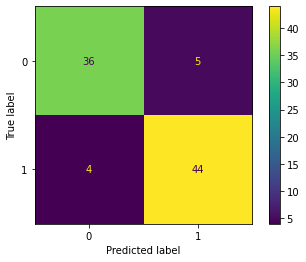

In [ ]:
metrics.plot_confusion_matrix(dt_clf, X_test, y_test)

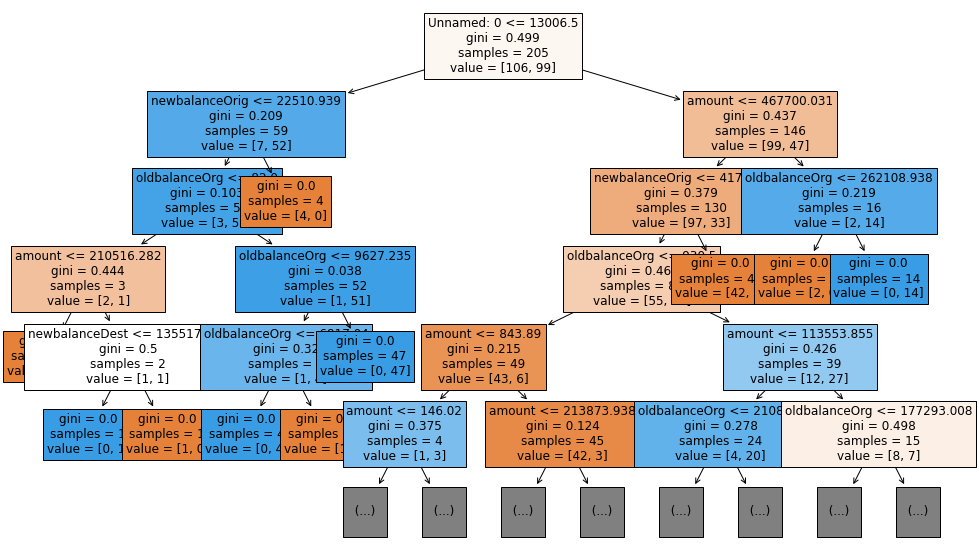

In [ ]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(17,10))
_ = plot_tree(dt_clf, max_depth=5, feature_names=list(X_train.columns), filled=True, fontsize=12)

# Feature Importance

In [ ]:
fi = pd.DataFrame({'features':X_train.columns,'importance':dt_clf.feature_importances_}).sort_values(by=['importance'], ascending=False)
fi

,features,importance
3,oldbalanceOrg,0.295076
0,Unnamed: 0,0.288902
2,amount,0.218760
4,newbalanceOrig,0.143215
6,newbalanceDest,0.041023
1,step,0.013023
5,oldbalanceDest,0.000000


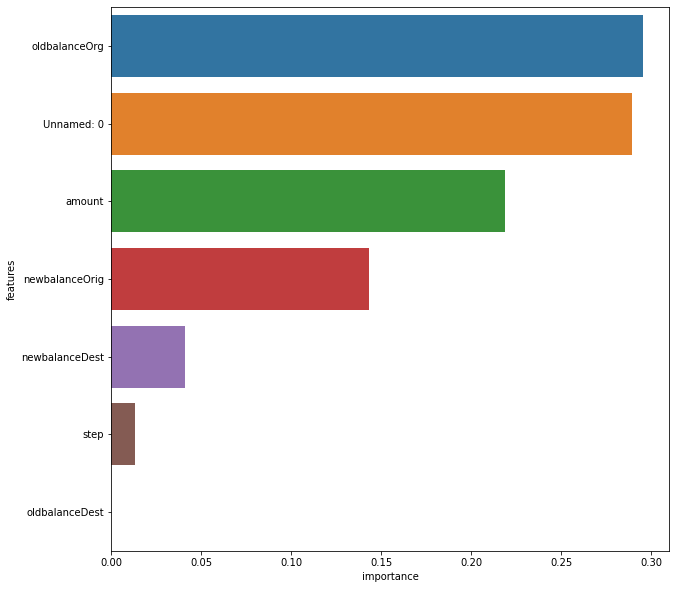

In [ ]:
plt.figure(figsize=(10,10))

sns.barplot(x="importance", y="features", data=fi)